## ANOVA analysis

In [3]:
import numpy as np
from pandas import read_csv
from numpy.random import chisquare
from matplotlib import pyplot as plt

In [4]:
# set freedom degree
df1 = 10
df2 = 10

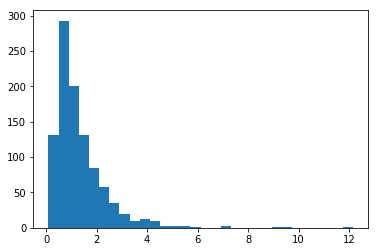

In [7]:
# simulate F distribution
y1 = chisquare(df1, 1000) # generate 1000 numbers which are chisquare distribution
y2 = chisquare(df2, 1000)
F = (y1/df1)/(y2/df2)

# check how F distribution looks like
plt.hist(F, bins=30)
plt.show()

## One-way analysis of variance
### Project: check whether different professions have different income
#### H0: different profession have the same variance, which means have the same income

In [14]:
data = read_csv("data9.csv")
data.head(3)

,专业,收入
0,统计学,3306
1,统计学,6496
2,统计学,3996


In [21]:
# change names
data = data.rename(columns={"专业":"profession", "收入":"income"})
data.profession.replace(["统计学", "金融学", "国际贸易学"],["statistics","finance", "international_trade"], inplace=True)
data.head(3)

,profession,income
0,statistics,3306
1,statistics,6496
2,statistics,3996


In [22]:
agg = data.groupby("profession")["income"].agg({'mean':np.mean,'size':np.size})
agg

/Users/qiuxianghu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,mean,size
profession,,
finance,4177.65,20
international_trade,3912.60,20
statistics,4640.15,20


In [24]:
from scipy.stats import f_oneway

data_stat = data[data["profession"]=="statistics"].income
data_fina = data[data["profession"]=="finance"].income
data_inter = data[data["profession"]=="international_trade"].income

In [26]:
f_oneway(data_stat, data_fina, data_inter)

F_onewayResult(statistic=3.1857331691363253, pvalue=0.04880466460274626)

#### Answer: because p value is smaller than 0.05, so different professions have different variance, so their income are different

## F distribution with different df

In [29]:
import numpy as np
from scipy.stats import f 
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

x = numpy.arange(0, 5, 0.01);

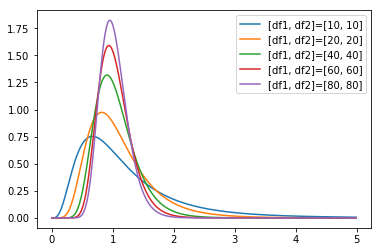

In [32]:
df1 = 10
df2 = 10
plt.plot(x, f.pdf(x, df1, df2), label="[df1, df2]=[%d, %d]"%(df1, df2))
df1 = 20
df2 = 20 
plt.plot(x, f.pdf(x, df1, df2), label="[df1, df2]=[%d, %d]"%(df1, df2))
df1 = 40
df2 = 40
plt.plot(x, f.pdf(x, df1, df2), label="[df1, df2]=[%d, %d]"%(df1, df2))
df1 = 60
df2 = 60
plt.plot(x, f.pdf(x, df1, df2), label="[df1, df2]=[%d, %d]"%(df1, df2))
df1 = 80
df2 = 80
plt.plot(x, f.pdf(x, df1, df2), label="[df1, df2]=[%d, %d]"%(df1, df2))

plt.legend()
plt.show()

## Two-way analysis of variance

### Project 1: Check whether advertisment and price will affect the sales

In [33]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [34]:
data = read_csv("data10.csv")
data

,地区,价格,销量
0,A1,P1,365
1,A1,P2,345
2,A1,P3,358
3,A2,P1,350
4,A2,P2,368
5,A2,P3,323
6,A3,P1,343
7,A3,P2,363
8,A3,P3,353
9,A4,P1,340


In [35]:
data = data.rename(columns={"地区":"region", "价格":"price", "销量":"sales"})
data.head(2)

,region,price,sales
0,A1,P1,365
1,A1,P2,345


In [36]:
# there is no interaction between region and price
formula = 'sales ~ C(region) + C(price)'

anova_results = anova_lm(ols(formula, data).fit())
anova_results # PR(>F) is the p value

,df,sum_sq,mean_sq,F,PR(>F)
C(region),3.0,588.250000,196.083333,0.83292,0.522763
C(price),2.0,112.166667,56.083333,0.23823,0.795135
Residual,6.0,1412.500000,235.416667,NaN,NaN


#### Answer: both the p value of region and price are bigger than 0.05, so the variance produced by combination betwen price and region is the same, so the strategy that use different price in different region will not affect the sales

### Project 2: Check whether advertisment and package will affect the sales

In [37]:
data = read_csv("data11.csv")
data.head(3)

,package,advertise,sales
0,A1,B1,2.80
1,A1,B1,2.73
2,A1,B2,2.04


In [39]:
# there is interaction between region and price
formula = 'sales ~ C(package) + C(advertise) + C(package) * C(advertise)'

anova_results = anova_lm(ols(formula, data).fit())
anova_results # PR(>F) is the p value

,df,sum_sq,mean_sq,F,PR(>F)
C(package),2.0,0.807211,0.403606,3.477027,0.076063
C(advertise),2.0,4.991078,2.495539,21.498851,0.000373
C(package):C(advertise),4.0,2.277122,0.569281,4.904303,0.022410
Residual,9.0,1.044700,0.116078,NaN,NaN


#### Answer: both the p value of all are small, so the variance produced by combination betwen package and advertise is not the same, so the strategy in using different package and different advertisment is useful